In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.shape

(200, 4)

In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df.head(100)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
95,163.3,31.6,52.9,16.9
96,197.6,3.5,5.9,16.7
97,184.9,21.0,22.0,20.5
98,289.7,42.3,51.2,25.4


<AxesSubplot:>

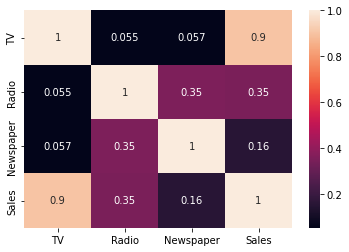

In [8]:
sns.heatmap(df.corr(),annot=True)

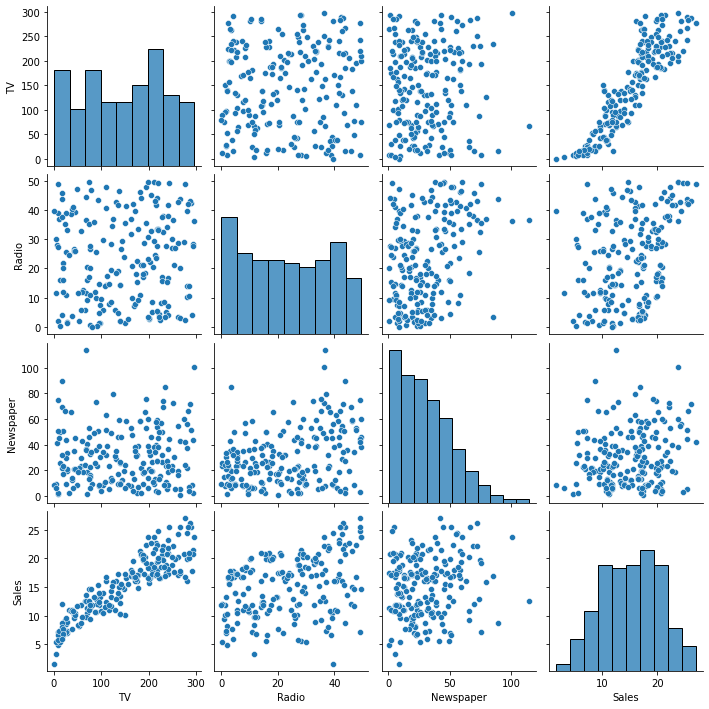

In [9]:
sns.pairplot(df)

<AxesSubplot:ylabel='Count'>

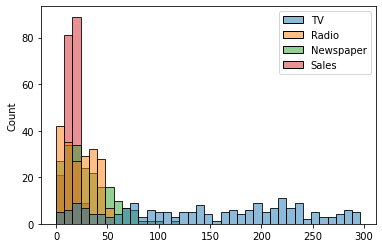

In [10]:
sns.histplot(df)

<AxesSubplot:ylabel='Newspaper'>

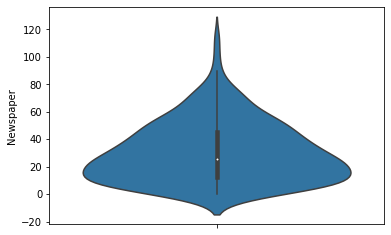

In [11]:
sns.violinplot(data=df,y=df['Newspaper'])


<AxesSubplot:ylabel='Newspaper'>

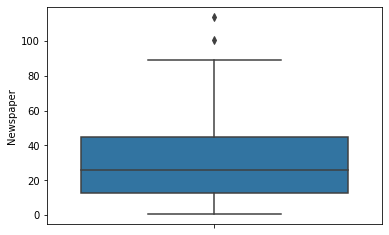

In [12]:
sns.boxplot(data=df,y=df['Newspaper'])

now have to remove outliers

In [13]:
q1,q3 = df['Newspaper'].quantile([0.25,0.75])
iqr=q3-q1
lf , uf =q1-1.5*iqr , q3+1.5*iqr
df['Newspaper']=np.where(df['Newspaper']>uf,df['Newspaper'].mean(),df['Newspaper'])
df['Newspaper']=np.where(df['Newspaper']<lf,df['Newspaper'].mean(),df['Newspaper'])

In [14]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.049440,0.901208
Radio,0.054809,1.000000,0.345313,0.349631
Newspaper,0.049440,0.345313,1.000000,0.150855
Sales,0.901208,0.349631,0.150855,1.000000


correlation is high for tv and Newspaper we can drop one among them but it is small data so keep it as it is

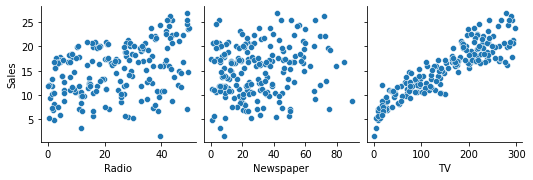

In [15]:
sns.pairplot(y_vars="Sales",x_vars=["Radio","Newspaper","TV"],data=df)

C:\Users\M RAJESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='TV'>

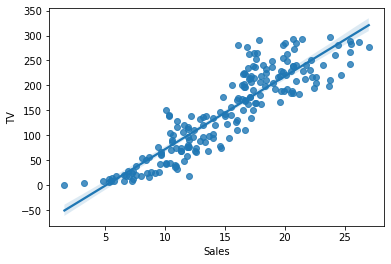

In [16]:
sns.regplot(df.Sales,df.TV)#,x_estimator=np.mean)

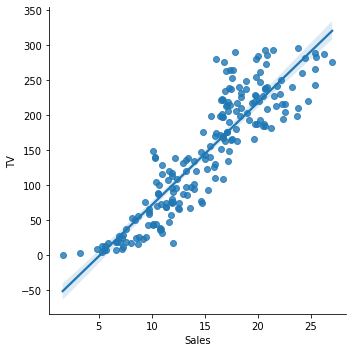

In [17]:
sns.lmplot(x="Sales",y="TV",data=df)

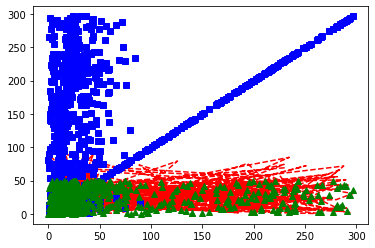

In [18]:
plt.plot(df, df["Newspaper"], 'r--', df, df["TV"], 'bs', df, df["Radio"], 'g^')
plt.show()

<AxesSubplot:title={'center':'boxplot'}>

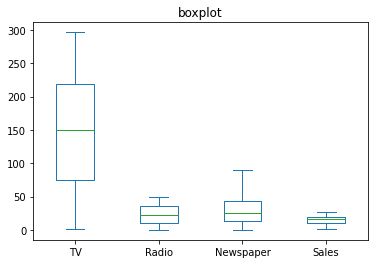

In [19]:
df.plot(kind='box', title='boxplot')

now no outliers